In [1]:
# import library-libary yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ambil dataset dengan nama kluster-jantung-koroner.csv
data = pd.read_csv('kluster-jantung-koroner.csv')

In [3]:
# menampilkan lima data teratas
data.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [5]:
# cek dimensi data (baris x kolom)
data.shape

(547, 3)

In [6]:
# filter hanya atribut Weight dan Cholesterol yang digunaka
data_filter = data[['Weight', 'Cholesterol']]

In [7]:
data_filter.head()

,Weight,Cholesterol
0,102,111
1,115,135
2,115,136
3,140,167
4,130,158


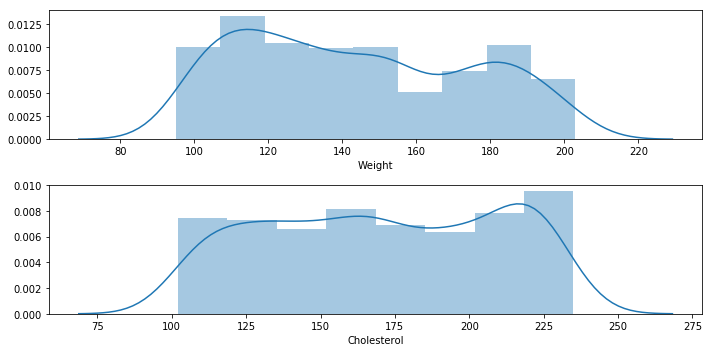

In [8]:
# menampilkan distribusi data dalam bentuk distribution plot
fig = plt.figure(figsize=(10,5))

fig.add_subplot(2,1,1)
sns.distplot(data_filter['Weight'])

fig.add_subplot(2,1,2)
sns.distplot(data_filter['Cholesterol'])

fig.tight_layout()

In [9]:
# hubungan korelasi antara Weight dan Cholesterol
data_filter.corr()

,Weight,Cholesterol
Weight,1.000000,0.988593
Cholesterol,0.988593,1.000000


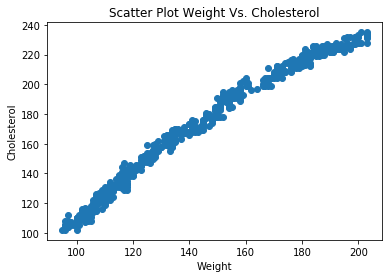

In [10]:
# Bivariate analysis antara atribut Weight dan Cholesterol dengan scatter plot
# menampilkan data dalam bentuk scatter
plt.scatter(data_filter['Weight'], data_filter['Cholesterol'])
plt.xlabel('Weight')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot Weight Vs. Cholesterol')
plt.show()

# Modeling

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(data_filter)
kmeans.cluster_centers_

array([[182.26315789, 217.04093567],
       [110.46073298, 125.97905759],
       [141.99459459, 173.24864865]])

# Evaluation

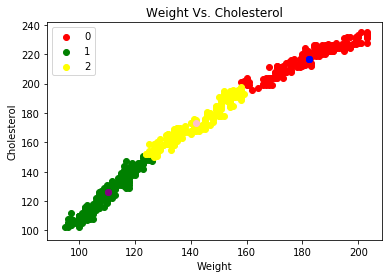

In [16]:
x = data_filter['Weight']
y = data_filter['Cholesterol']

group = kmeans.labels_

colors = ['red', 'green', 'yellow']
fig, ax = plt.subplots()

for g in set(kmeans.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    ax.scatter(182.263,  217.041, c='blue')
    ax.scatter(110.461,  125.980, c='purple')
    ax.scatter(141.994,  173.249, c='pink')
    plt.xlabel('Weight')
    plt.ylabel('Cholesterol')
    plt.title('Weight Vs. Cholesterol')

ax.legend()
plt.show()

# Deployment

In [18]:
data_calon_peserta = data_filter[data_filter.Cluster==1]
data_calon_peserta

,Weight,Cholesterol,Cluster
0,102,111,1
1,115,135,1
2,115,136,1
6,114,131,1
10,104,116,1
...,...,...,...
539,125,149,1
540,123,149,1
541,116,130,1
544,107,115,1
